In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install scikit-learn imbalanced-learn matplotlib seaborn

In [ ]:
!pip install codecarbon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.0/179.0 kB 624.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.6 MB/s eta 0:00:00


In [ ]:
import pyproj
import pandas as pd
import os
import matplotlib.pyplot as plt

# Configurar para visualización de Plotly en Google Colab
import plotly.io as pio
pio.renderers.default = 'colab'

from itertools import groupby

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import warnings
from sklearn.exceptions import ConvergenceWarning
import requests

def get_server_location():
    response = requests.get('https://ipinfo.io')
    data = response.json()
    return data

server_info = get_server_location()
print(server_info)

{'ip': '35.245.105.31', 'hostname': '31.105.245.35.bc.googleusercontent.com', 'city': 'Washington', 'region': 'Washington, D.C.', 'country': 'US', 'loc': '38.8951,-77.0364', 'org': 'AS396982 Google LLC', 'postal': '20004', 'timezone': 'America/New_York', 'readme': 'https://ipinfo.io/missingauth'}


In [ ]:
# Creamos la instancia para medir el carbono emitido por el código

from codecarbon import EmissionsTracker

# Crear una instancia del rastreador de emisiones
# tracker = EmissionsTracker()

# Importación datos

In [ ]:
# Crear una instancia del rastreador de emisiones
tracker = EmissionsTracker()

[codecarbon INFO @ 16:35:50] [setup] RAM Tracking...
[codecarbon INFO @ 16:35:50] [setup] GPU Tracking...
[codecarbon INFO @ 16:35:50] No GPU found.
[codecarbon INFO @ 16:35:50] [setup] CPU Tracking...
[codecarbon WARNING @ 16:35:50] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:35:53] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:35:53] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:35:53] >>> Tracker's metadata:
[codecarbon INFO @ 16:35:53]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 16:35:53]   Python version: 3.10.12
[codecarbon INFO @ 16:35:53]   CodeCarbon version: 2.3.2
[codecarbon INFO @ 16:35:53]   Available RAM : 12.675 GB
[codecarbon INFO @ 16:35:53]   CPU count: 2
[codecarbon INFO @ 16:35:53]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:35:53]   GPU count: None
[codec

In [ ]:
# Iniciar el rastreador
tracker.start()

In [ ]:
# Ruta de la carpeta actual en Google Drive
path = '/content/drive/My Drive/Master ciencia de datos (Big Data & TFM)/TFM - tormentas solares/bases de datos - nuevo'

In [ ]:
# 1º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_1_grado.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df1 = pd.read_excel(file_path_terremotos)

[codecarbon INFO @ 16:36:09] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:36:09] Energy consumed for all CPUs : 0.000178 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:36:09] 0.000198 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:36:24] Energy consumed for RAM : 0.000040 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:36:24] Energy consumed for all CPUs : 0.000355 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:36:24] 0.000395 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:36:39] Energy consumed for RAM : 0.000059 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:36:39] Energy consumed for all CPUs : 0.000532 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:36:39] 0.000592 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:36:54] Energy consumed for RAM : 0.000079 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:36:54] Energy consumed for a

In [ ]:
# 2º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_2_grado.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df2 = pd.read_excel(file_path_terremotos)

[codecarbon INFO @ 16:43:39] Energy consumed for RAM : 0.000614 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:43:39] Energy consumed for all CPUs : 0.005490 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:43:39] 0.006104 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:43:54] Energy consumed for RAM : 0.000633 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:43:54] Energy consumed for all CPUs : 0.005667 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:43:54] 0.006301 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:44:09] Energy consumed for RAM : 0.000653 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:44:09] Energy consumed for all CPUs : 0.005846 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:44:09] 0.006500 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:44:24] Energy consumed for RAM : 0.000673 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:44:24] Energy consumed for a

In [ ]:
# 3º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_3_grado.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df3 = pd.read_excel(file_path_terremotos)

[codecarbon INFO @ 16:50:55] Energy consumed for RAM : 0.001188 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:50:55] Energy consumed for all CPUs : 0.010628 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:50:55] 0.011816 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:51:10] Energy consumed for RAM : 0.001208 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:51:10] Energy consumed for all CPUs : 0.010805 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:51:10] 0.012013 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:51:25] Energy consumed for RAM : 0.001227 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:51:25] Energy consumed for all CPUs : 0.010982 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:51:25] 0.012209 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:51:40] Energy consumed for RAM : 0.001247 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:51:40] Energy consumed for a

In [ ]:
# 4º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_4_grado.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df4 = pd.read_excel(file_path_terremotos)

[codecarbon INFO @ 16:58:41] Energy consumed for RAM : 0.001802 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:58:41] Energy consumed for all CPUs : 0.016128 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:58:41] 0.017930 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:58:56] Energy consumed for RAM : 0.001822 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:58:56] Energy consumed for all CPUs : 0.016305 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:58:56] 0.018127 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:59:11] Energy consumed for RAM : 0.001842 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:59:11] Energy consumed for all CPUs : 0.016482 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:59:11] 0.018324 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:59:26] Energy consumed for RAM : 0.001862 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:59:26] Energy consumed for a

In [ ]:
# 5º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_5_grado.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df5 = pd.read_excel(file_path_terremotos)

[codecarbon INFO @ 17:05:57] Energy consumed for RAM : 0.002377 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:05:57] Energy consumed for all CPUs : 0.021267 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:05:57] 0.023644 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:06:12] Energy consumed for RAM : 0.002397 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:06:12] Energy consumed for all CPUs : 0.021444 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:06:12] 0.023841 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:06:27] Energy consumed for RAM : 0.002416 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:06:27] Energy consumed for all CPUs : 0.021621 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:06:27] 0.024037 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:06:42] Energy consumed for RAM : 0.002436 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:06:42] Energy consumed for a

In [ ]:
# 6º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_6_grado.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df6 = pd.read_excel(file_path_terremotos)

[codecarbon INFO @ 17:13:13] Energy consumed for RAM : 0.002952 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:13:13] Energy consumed for all CPUs : 0.026410 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:13:13] 0.029361 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:13:28] Energy consumed for RAM : 0.002971 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:13:28] Energy consumed for all CPUs : 0.026587 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:13:28] 0.029558 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:13:43] Energy consumed for RAM : 0.002991 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:13:43] Energy consumed for all CPUs : 0.026764 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:13:43] 0.029755 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:13:58] Energy consumed for RAM : 0.003011 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:13:58] Energy consumed for a

In [ ]:
# 7º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_7_grado.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df7 = pd.read_excel(file_path_terremotos)

[codecarbon INFO @ 17:20:30] Energy consumed for RAM : 0.003527 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:20:30] Energy consumed for all CPUs : 0.031559 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:20:30] 0.035086 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:20:45] Energy consumed for RAM : 0.003547 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:20:45] Energy consumed for all CPUs : 0.031736 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:20:45] 0.035283 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:21:00] Energy consumed for RAM : 0.003567 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:21:00] Energy consumed for all CPUs : 0.031913 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:21:00] 0.035479 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:21:15] Energy consumed for RAM : 0.003586 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:21:15] Energy consumed for a

In [ ]:
# 8º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_8_grado.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df8 = pd.read_excel(file_path_terremotos)

[codecarbon INFO @ 17:27:30] Energy consumed for RAM : 0.004081 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:27:30] Energy consumed for all CPUs : 0.036516 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:27:30] 0.040596 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:27:45] Energy consumed for RAM : 0.004101 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:27:45] Energy consumed for all CPUs : 0.036693 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:27:45] 0.040793 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:28:00] Energy consumed for RAM : 0.004120 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:28:00] Energy consumed for all CPUs : 0.036870 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:28:00] 0.040990 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:28:15] Energy consumed for RAM : 0.004140 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:28:15] Energy consumed for a

In [ ]:
# 9º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_9_grado.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df9 = pd.read_excel(file_path_terremotos)

[codecarbon INFO @ 17:34:46] Energy consumed for RAM : 0.004655 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:34:46] Energy consumed for all CPUs : 0.041657 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:34:46] 0.046312 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:35:01] Energy consumed for RAM : 0.004675 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:35:01] Energy consumed for all CPUs : 0.041834 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:35:01] 0.046509 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:35:16] Energy consumed for RAM : 0.004695 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:35:16] Energy consumed for all CPUs : 0.042011 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:35:16] 0.046706 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:35:31] Energy consumed for RAM : 0.004715 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:35:31] Energy consumed for a

In [ ]:
# 10º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_10_grado.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df10 = pd.read_excel(file_path_terremotos)

[codecarbon INFO @ 17:42:02] Energy consumed for RAM : 0.005229 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:42:02] Energy consumed for all CPUs : 0.046793 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:42:02] 0.052022 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:42:17] Energy consumed for RAM : 0.005249 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:42:17] Energy consumed for all CPUs : 0.046970 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:42:17] 0.052219 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:42:32] Energy consumed for RAM : 0.005269 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:42:32] Energy consumed for all CPUs : 0.047147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:42:32] 0.052415 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:42:47] Energy consumed for RAM : 0.005289 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:42:47] Energy consumed for a

In [ ]:
# 11º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_11_grado.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df11 = pd.read_excel(file_path_terremotos)

[codecarbon INFO @ 17:49:18] Energy consumed for RAM : 0.005805 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:49:18] Energy consumed for all CPUs : 0.051939 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:49:18] 0.057744 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:49:33] Energy consumed for RAM : 0.005824 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:49:33] Energy consumed for all CPUs : 0.052116 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:49:33] 0.057940 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:49:48] Energy consumed for RAM : 0.005844 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:49:48] Energy consumed for all CPUs : 0.052294 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:49:48] 0.058138 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:50:03] Energy consumed for RAM : 0.005864 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:50:03] Energy consumed for a

In [ ]:
# 12º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_12_grado.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df12 = pd.read_excel(file_path_terremotos)

[codecarbon INFO @ 17:56:33] Energy consumed for RAM : 0.006379 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:56:33] Energy consumed for all CPUs : 0.057076 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:56:33] 0.063455 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:56:48] Energy consumed for RAM : 0.006399 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:56:48] Energy consumed for all CPUs : 0.057253 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:56:48] 0.063652 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:57:03] Energy consumed for RAM : 0.006418 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:57:03] Energy consumed for all CPUs : 0.057430 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 17:57:03] 0.063849 kWh of electricity used since the beginning.
[codecarbon INFO @ 17:57:18] Energy consumed for RAM : 0.006438 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:57:19] Energy consumed for a

In [ ]:
tracker.stop()

[codecarbon INFO @ 18:03:41] Energy consumed for RAM : 0.006942 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 18:03:41] Energy consumed for all CPUs : 0.062120 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 18:03:41] 0.069063 kWh of electricity used since the beginning.


0.015092543128669157

In [ ]:
df10.head()

,year,day,hr,MES,DIA,FECHA,densidad,temperatura,helio,velocidad,...,cantidad_lag_111,cantidad_lag_112,cantidad_lag_113,cantidad_lag_114,cantidad_lag_115,cantidad_lag_116,cantidad_lag_117,cantidad_lag_118,cantidad_lag_119,cantidad_lag_120
0,1998,36,0,2,5,1998-02-05,16.655,9529.1,0.0127,323.90,...,False,False,False,False,False,False,False,False,False,False
1,1998,36,1,2,5,1998-02-05,20.601,8757.7,0.0141,322.89,...,False,False,False,False,False,False,False,False,False,False
2,1998,36,2,2,5,1998-02-05,18.679,9559.4,0.0087,324.61,...,False,False,False,False,False,False,False,False,False,False
3,1998,36,3,2,5,1998-02-05,18.481,8965.9,0.0051,322.68,...,False,False,False,False,False,False,False,False,False,False
4,1998,36,4,2,5,1998-02-05,28.315,8329.0,0.0061,321.84,...,False,False,False,False,False,False,False,False,False,False


# MODELO PREDICTIVO - Regresión Logística

Hacemos una simple regresión logística sobre los terremotos situados más allá de 7º respecto los bordes tectónicos.

In [ ]:
# Iniciar el rastreador
tracker.start()

[codecarbon WARNING @ 22:50:01] Already started tracking


In [ ]:
data = df7.copy()

In [ ]:
# Separar las variables predictoras (X) y la variable objetivo (y)
X = data[['velocidad', 'densidad', 'temperatura', 'helio']]
y = data['cantidad']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Crear y entrenar un modelo de Regresión Logística
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test_scaled)

In [ ]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9167360125312056
Confusion Matrix:
[[37456     0]
 [ 3402     0]]
Classification Report:
              precision    recall  f1-score   support

       False       0.92      1.00      0.96     37456
        True       0.00      0.00      0.00      3402

    accuracy                           0.92     40858
   macro avg       0.46      0.50      0.48     40858
weighted avg       0.84      0.92      0.88     40858



La matriz de confusión es sospechosa. Puede deberse a que la cantidad de 0 y de 1 está muy desbalanceada.

In [ ]:
# Contar la frecuencia de cada clase en la columna 'terremoto'
class_counts = data['cantidad'].value_counts()

# Imprimir los resultados
print("Frecuencia de cada clase de 'terremoto':")
print(class_counts)

# Calcular la proporción de cada clase
class_proportion = data['cantidad'].value_counts(normalize=True)

# Imprimir la proporción de cada clase
print("\nProporción de cada clase de 'terremoto':")
print(class_proportion)

Frecuencia de cada clase de 'terremoto':
False    187627
True      16661
Name: cantidad, dtype: int64

Proporción de cada clase de 'terremoto':
False    0.918444
True     0.081556
Name: cantidad, dtype: float64


Como hay más del 90% de casos con valor 0, haremos una **regresión logística ponderada** para balancear esta diferencia.

In [ ]:
# Crear y entrenar un modelo de Regresión Logística con pesos de clase ponderados
model_weighted = LogisticRegression(class_weight='balanced', random_state=42)
model_weighted.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
predictions_weighted = model_weighted.predict(X_test_scaled)

# Evaluar el rendimiento del modelo con pesos de clase ponderados
accuracy_weighted = accuracy_score(y_test, predictions_weighted)
conf_matrix_weighted = confusion_matrix(y_test, predictions_weighted)
classification_rep_weighted = classification_report(y_test, predictions_weighted)

print(f'Accuracy with class weights: {accuracy_weighted}')
print(f'Confusion Matrix with class weights:\n{conf_matrix_weighted}')
print(f'Classification Report with class weights:\n{classification_rep_weighted}')

Accuracy with class weights: 0.5660825297371384
Confusion Matrix with class weights:
[[21579 15877]
 [ 1852  1550]]
Classification Report with class weights:
              precision    recall  f1-score   support

       False       0.92      0.58      0.71     37456
        True       0.09      0.46      0.15      3402

    accuracy                           0.57     40858
   macro avg       0.50      0.52      0.43     40858
weighted avg       0.85      0.57      0.66     40858





---



---



---



Con **técnicas de sobremuestreo** usando SMOTE:

In [ ]:
from imblearn.over_sampling import SMOTE

# Aplicar sobremuestreo usando la técnica SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Crear y entrenar un modelo de Regresión Logística en los datos de sobremuestreo
model_resampled = LogisticRegression(random_state=42)
model_resampled.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de prueba
predictions_resampled = model_resampled.predict(X_test_scaled)

# Evaluar el rendimiento del modelo con sobremuestreo
accuracy_resampled = accuracy_score(y_test, predictions_resampled)
conf_matrix_resampled = confusion_matrix(y_test, predictions_resampled)
classification_rep_resampled = classification_report(y_test, predictions_resampled)

print(f'Accuracy with oversampling: {accuracy_resampled}')
print(f'Confusion Matrix with oversampling:\n{conf_matrix_resampled}')
print(f'Classification Report with oversampling:\n{classification_rep_resampled}')

Accuracy with oversampling: 0.5699740564883254
Confusion Matrix with oversampling:
[[21776 15680]
 [ 1890  1512]]
Classification Report with oversampling:
              precision    recall  f1-score   support

       False       0.92      0.58      0.71     37456
        True       0.09      0.44      0.15      3402

    accuracy                           0.57     40858
   macro avg       0.50      0.51      0.43     40858
weighted avg       0.85      0.57      0.67     40858



Nos da un poco mejor el resultado de accuracy aplicando técnicas de remuestreo: aproximadamente un 60% de accuraccy. Aunque la recall empeora.

In [ ]:
tracker.stop()

[codecarbon WARNING @ 22:53:56] Tracker already stopped !
[codecarbon WARNING @ 22:53:56] Background scheduler didn't run for a long period (820s), results might be inaccurate
[codecarbon INFO @ 22:53:56] Energy consumed for RAM : 0.005655 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 22:53:56] Energy consumed for all CPUs : 0.142764 kWh. Total CPU Power : 120.0 W
[codecarbon INFO @ 22:53:56] 0.148419 kWh of electricity used since the beginning.


0.02059305887850776

# Modelo Predictivo - Regresión Logística con varios dataframes según el grado

En vez de sobremuestreo, haremos submuestreo, pues no se inventa datos sintéticos y dará valores más reales.

La elección de la métrica de predicción depende de nuestros objetivos y de las implicaciones de los errores de predicción en la aplicación específica:

- Si la detección precisa de terremotos es crucial y podemos tolerar algunos falsos positivos, podríamos preferir la opción con mayor sensibilidad (recall), incluso a expensas de la precisión general.

- Si necesitamos una clasificación generalmente precisa y podemos aceptar que algunos terremotos reales no se detecten, podríamos optar por una mayor precisión.

- Si buscamos un equilibrio entre ambos, la opción con 50% accuracy y 50% recall podría ser la elección adecuada.

En un problema donde el desbalance de clases es significativo, y en particular en la detección de eventos raros como los terremotos, no solo la accuracy es suficiente para evaluar el rendimiento del modelo.

**Recall (Sensibilidad o True Positive Rate)**: Es una métrica crucial en problemas desbalanceados, especialmente cuando estamos más interesado en capturar la mayoría de los casos positivos (terremotos) incluso si eso significa tener más falsos positivos.

**Precision (Valor predictivo positivo)**: Mide la proporción de instancias predichas como positivas que son verdaderamente positivas. Es importante cuando los falsos positivos son costosos o indeseados.

**F1-Score**: Es una métrica que combina precision y recall. Puede ser útil cuando buscamos un equilibrio entre precision y recall.

**Área bajo la curva ROC (AUC-ROC)**: Es útil para evaluar el rendimiento del modelo en diferentes umbrales de clasificación. A menudo, se utiliza cuando hay un equilibrio entre las clases y se desea evaluar cómo se comporta el modelo en diferentes niveles de sensibilidad y especificidad.

Dado que estamos tratando con la detección de terremotos, donde la clase positiva es rara, la recall suele ser la métrica más relevante. Esto se debe a que, en este contexto, es fundamental identificar la mayor cantidad posible de terremotos, incluso a costa de tener algunos falsos positivos.

Dicho esto, la elección de la métrica depende de nuestro problema y de cuáles son las consecuencias prácticas y costos asociados con los falsos positivos y falsos negativos en nuestra aplicación específica. Tendríamos que considerar el impacto práctico de nuestras decisiones y ajustar las métricas en consecuencia.

In [ ]:
# Iniciar el rastreador
tracker.start()

In [ ]:
def modelo_logistico_custom(df_list, tipo='default'):

    def modelo_logistico(df, lag_variable, tipo='default'):

      # Separar las variables predictoras (X) y la variable objetivo (y)
      X = df[['velocidad', 'densidad', 'temperatura', 'helio']]
      y = df[lag_variable]

      # Dividir los datos en conjuntos de entrenamiento y prueba
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

      # Aplicar submuestreo en el conjunto de entrenamiento
      undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
      X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

      if tipo == 'default':
        model = LogisticRegression(random_state=42)

      elif tipo == 'ridge':
        model = LogisticRegression(penalty='l2', solver='sag', max_iter=120, random_state=42)

      elif tipo == 'lasso':
        model = LogisticRegression(penalty='l1', solver='saga', max_iter=120, random_state=42)

      else:
        model = LogisticRegression(random_state=42)

      model.fit(X_resampled, y_resampled)

      # Realizar predicciones en el conjunto de prueba
      y_pred = model.predict(X_test)

      # Calcular la accuracy y recall
      accuracy = accuracy_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      auc_roc = roc_auc_score(y_test, y_pred)

      return accuracy, recall, precision, f1, auc_roc

    '''


    '''

    #######################################################
    ###############    CADA GRADO - TOTAL  ################
    #######################################################

    lag_indices_all = []
    accuracies_all = []
    recalls_all = []
    precision_all = []
    f1_all = []
    auc_roc_all = []

    # Ignorar las advertencias de ConvergenceWarning
    warnings.filterwarnings("ignore", category=ConvergenceWarning)


    # Iterar sobre los DataFrames y ajustar modelos de regresión logística con submuestreo
    for i, df in enumerate(df_list, start=1):
        # Obtener las columnas desde 'cantidad' hasta el final, incluyendo 'cantidad'
        lag_variables = df.columns[df.columns.get_loc('cantidad'):]

        # Listas para almacenar los resultados
        lag_indices = []
        accuracies = []
        recalls = []
        precisions = []
        f1s = []
        auc_rocs = []

        for j, lag_variable in enumerate(lag_variables):
            # Llamada a la función para ajustar el modelo y obtener la accuracy con submuestreo
            accuracy, recall, precision, f1, auc_roc = modelo_logistico(df, lag_variable, tipo)   # Obtención métricas por cada iteración

            # Almacenar resultados
            lag_indices.append(j)
            accuracies.append(accuracy)
            recalls.append(recall)
            precisions.append(precision)
            f1s.append(f1)
            auc_rocs.append(auc_roc)

        # Almacenar resultados acumulados
        lag_indices_all.append(lag_indices)
        accuracies_all.append(accuracies)
        recalls_all.append(recalls)
        precision_all.append(precisions)
        f1_all.append(f1s)
        auc_roc_all.append(auc_rocs)

        # Figura
        plt.figure(figsize=(12, 6))

        # Métricas
        plt.plot(lag_indices, accuracies, marker='o', linestyle='--', color='blue', alpha=0.5, markersize=4, label='Accuracy')
        plt.plot(lag_indices, recalls, marker='o', linestyle='--', color='green', alpha=0.5, markersize=4, label='Recall')
        plt.plot(lag_indices, precisions, marker='o', linestyle='--', color='#001F3F', alpha=0.5, markersize=4, label='Precision')
        plt.plot(lag_indices, f1s, marker='o', linestyle='--', color='#0074CC', alpha=0.5, markersize=4, label='f1')
        plt.plot(lag_indices, auc_rocs, marker='o', linestyle='--', color='red', alpha=0.7, markersize=4, label='AUC-ROC')

        plt.axhline(y=0.5, color='red', linestyle='-', linewidth=1, alpha=0.6, label = 'Métrica = 0.5')  # Línea horizontal en y=0.5

        if tipo == 'default':
            plt.title(f'\nMétricas Modelo vs. Hora de Retraso - Excluyendo Terremotos a {i}º de los Bordes Tectónicos - Sin penalización')
        elif tipo == 'ridge':
            plt.title(f'\nMétricas Modelo vs. Hora de Retraso - Excluyendo Terremotos a {i}º de los Bordes Tectónicos - RIDGE')
        elif tipo == 'lasso':
            plt.title(f'\nMétricas Modelo vs. Hora de Retraso - Excluyendo Terremotos a {i}º de los Bordes Tectónicos - LASSO')
        else:
            plt.title(f'\nMétricas Modelo vs. Hora de Retraso - Excluyendo Terremotos a {i}º de los Bordes Tectónicos - Sin penalización')


        plt.xlabel(f'Hora de Retraso')
        plt.ylabel('Métricas')
        plt.ylim(0, 1)  # Acotar el eje y entre 0 y 1
        plt.grid(True)
        plt.xticks(range(0, 121, 12))  # Para asegurarse de que solo aparezcan los valores enteros en el eje x
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

        if tipo == 'default':
            plt.savefig(path + f'/imagenes/probabilidad_{i}_grados_TODAS_metricas_SIN_PENALIZACION.png')
        elif tipo == 'ridge':
            plt.savefig(path + f'/imagenes/probabilidad_{i}_grados_TODAS_metricas_RIDGE.png')
        elif tipo == 'lasso':
            plt.savefig(path + f'/imagenes/probabilidad_{i}_grados_TODAS_metricas_LASSO.png')
        else:
            plt.savefig(path + f'/imagenes/probabilidad_{i}_grados_TODAS_metricas_SIN_PENALIZACION.png')


        plt.show()


    # Obtener la media de cada componente de cada sublista para hacer 3 medias
    medias_sublistas = []
    medias_sublistas_recall = []
    medias_sublistas_precision = []

    for i in range(0, len(accuracies_all), 4):
        grupo = accuracies_all[i:i+4]
        medias_grupo = [sum(elemento) / len(elemento) for elemento in zip(*grupo)]
        medias_sublistas.append(medias_grupo)

    for i in range(0, len(recalls_all), 4):
        grupo = recalls_all[i:i+4]
        medias_grupo_recall = [sum(elemento) / len(elemento) for elemento in zip(*grupo)]
        medias_sublistas_recall.append(medias_grupo_recall)

    for i in range(0, len(precision_all), 4):
        grupo = precision_all[i:i+4]
        medias_grupo_precision = [sum(elemento) / len(elemento) for elemento in zip(*grupo)]
        medias_sublistas_precision.append(medias_grupo_precision)



    # Obtener la media de cada componente de cada sublista para hacer 4 conjuntos de medias
    medias_sublistas_4 = []
    medias_sublistas_recall_4 = []
    medias_sublistas_precision_4 = []

    for i in range(0, len(accuracies_all), 3):
        grupo = accuracies_all[i:i+3]
        medias_grupo = [sum(elemento) / len(elemento) for elemento in zip(*grupo)]
        medias_sublistas_4.append(medias_grupo)

    for i in range(0, len(recalls_all), 3):
        grupo = recalls_all[i:i+3]
        medias_grupo_recall = [sum(elemento) / len(elemento) for elemento in zip(*grupo)]
        medias_sublistas_recall_4.append(medias_grupo_recall)

    for i in range(0, len(precision_all), 3):
        grupo = precision_all[i:i+3]
        medias_grupo_precision = [sum(elemento) / len(elemento) for elemento in zip(*grupo)]
        medias_sublistas_precision_4.append(medias_grupo_precision)



    #######################################################
    ###############    LA MEDIA CADA 4º   #################
    #######################################################

    print(f'________________________________')
    print(f'\n\n\n\n\n\n MEDIA CADA 4º\n\n\n')
    print(f'________________________________')

    # Configuración de la gráfica
    plt.figure(figsize=(10, 6))

    # Graficar las curvas de accuracy
    plt.plot(lag_indices, medias_sublistas[0], label='Media Grados desde 1º a 4º', marker='o', linestyle='-', color='blue', alpha=0.5, markersize=4, linewidth=1)
    plt.plot(lag_indices, medias_sublistas[1], label='Media Grados desde 5º a 8º', marker='o', linestyle='--', color='red', alpha=0.5, markersize=4, linewidth=1)
    plt.plot(lag_indices, medias_sublistas[2], label='Media Grados desde 9º a 12º', marker='o', linestyle='-', color='green', alpha=0.5, markersize=4, linewidth=1)

    # Configuración de la gráfica
    plt.title('Comportamiento de Medias de Accuracy en función de la Hora de Retraso', fontsize=14)
    plt.xlabel('Hora de Retraso', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(fontsize=10)  # Ajusta el tamaño de la leyenda
    plt.grid(True, linestyle='--', alpha=0.7)

    # Personalización del fondo
    #plt.gca().set_facecolor('#F8F8F8')

    # Guardar la gráfica en un archivo PNG

    if tipo == 'default':
        plt.savefig(path + '/imagenes/probabilidad_media_conjunta_SIN_PENALIZACION.png')
    elif tipo == 'ridge':
         plt.savefig(path + '/imagenes/probabilidad_media_conjunta_RIDGE.png')
    elif tipo == 'lasso':
         plt.savefig(path + '/imagenes/probabilidad_media_conjunta_LASSO.png')
    else:
         plt.savefig(path + '/imagenes/probabilidad_media_conjunta_SIN_PENALIZACION.png')



    plt.show()


    ###############################################


    # Configuración de las subgráficas
    fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

    # Graficar las curvas en subgráficas separadas
    for i in range(3):
        axs[i].plot(lag_indices[:73], medias_sublistas[i][:73], label=f'Accuracy Media', color='blue', linewidth=2, linestyle='--', marker='o', markersize=4, alpha=0.5)
        axs[i].plot(lag_indices[:73], medias_sublistas_recall[i][:73], label=f'Recall Media', color='green', linewidth=1, linestyle='-', marker='o', markersize=4, alpha=0.5)
        axs[i].plot(lag_indices[:73], medias_sublistas_precision[i][:73], label=f'Precision Media', color='#001F3F', linewidth=1, linestyle='-', marker='o', markersize=4, alpha=0.5)
        axs[i].axhline(y=0.5, color='red', linestyle='-', linewidth=1, alpha=0.6, label='Métrica = 0.5')  # Línea horizontal en y=0.5

        if tipo == 'default':
            axs[i].set_title(f'\nMedia de Métricas con { 4*i + 1 }º a { 4*i + 4 }º de Separación de los Bordes Respecto la Hora de Retraso - Sin penalización')
        elif tipo == 'ridge':
            axs[i].set_title(f'\nMedia de Métricas con { 4*i + 1 }º a { 4*i + 4 }º de Separación de los Bordes Respecto la Hora de Retraso - RIDGE')
        elif tipo == 'lasso':
            axs[i].set_title(f'\nMedia de Métricas con { 4*i + 1 }º a { 4*i + 4 }º de Separación de los Bordes Respecto la Hora de Retraso - LASSO')
        else:
            axs[i].set_title(f'\nMedia de Métricas con { 4*i + 1 }º a { 4*i + 4 }º de Separación de los Bordes Respecto la Hora de Retraso - Sin penalización')

        axs[i].set_ylabel('Métricas')
        axs[i].legend(loc='upper left', bbox_to_anchor=(1, 1))
        axs[i].grid(True)
        axs[i].set_ylim(0, 1)
        axs[i].set_xlim(0,72)

    # Configuración adicional para la última subgráfica
    axs[-1].set_xlabel('Hora de Retraso')
    axs[-1].set_xticks(range(0, 73, 12))  # Asegurar valores enteros en el eje x

    # Guardar la gráfica en un archivo PNG

    if tipo == 'default':
        plt.savefig(path + '/imagenes/probabilidad_media_conjunta_subplots_3PARTICIONES_TODAS_METRICAS_72_horas_SIN_PENALIZACION.png')
    elif tipo == 'ridge':
         plt.savefig(path + '/imagenes/probabilidad_media_conjunta_subplots_3PARTICIONES_TODAS_METRICAS_72_horas_RIDGE.png')
    elif tipo == 'lasso':
         plt.savefig(path + '/imagenes/probabilidad_media_conjunta_subplots_3PARTICIONES_TODAS_METRICAS_72_horas_LASSO.png')
    else:
         plt.savefig(path + '/imagenes/probabilidad_media_conjunta_subplots_3PARTICIONES_TODAS_METRICAS_72_horas_SIN_PENALIZACION.png')


    plt.show()



    #######################################################
    ###############    LA MEDIA CADA 3º   #################
    #######################################################

    print(f'\n\n\n MEDIA CADA 3º\n\n\n')

    # Configuración de la gráfica
    plt.figure(figsize=(10, 6))

    # Graficar las curvas
    plt.plot(lag_indices, medias_sublistas_4[0], label='Media Grados desde 1º a 3º', marker='o', linestyle='-', color='blue', alpha=0.5, markersize=4, linewidth=1)
    plt.plot(lag_indices, medias_sublistas_4[1], label='Media Grados desde 4º a 6º', marker='o', linestyle='--', color='red', alpha=0.5, markersize=4, linewidth=1)
    plt.plot(lag_indices, medias_sublistas_4[2], label='Media Grados desde 7º a 9º', marker='o', linestyle='-', color='purple', alpha=0.5, markersize=4, linewidth=1)
    plt.plot(lag_indices, medias_sublistas_4[3], label='Media Grados desde 10º a 12º', marker='o', linestyle='-', color='black', alpha=0.2, markersize=4, linewidth=1)

    # Configuración de la gráfica
    plt.axhline(y=0.5, color='red', linestyle='-', linewidth=1, alpha=0.5, label='Métrica = 0.5')
    plt.title('Comportamiento de Medias de Accuracy en función de la Hora de Retraso', fontsize=14)
    plt.xlabel('Hora de Retraso', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(fontsize=7.5, loc='lower left')  # Ajusta el tamaño de la leyenda
    plt.grid(True, linestyle='--', alpha=0.7)

    # Personalización del fondo
    #plt.gca().set_facecolor('#F8F8F8')

    # Guardar la gráfica en un archivo PNG...

    if tipo == 'default':
        plt.savefig(path + '/imagenes/probabilidad_media_conjunta_4particiones_SIN_PENALIZACION.png')
    elif tipo == 'ridge':
         plt.savefig(path + '/imagenes/probabilidad_media_conjunta_4particiones_RIDGE.png')
    elif tipo == 'lasso':
         plt.savefig(path + '/imagenes/probabilidad_media_conjunta_4particiones_LASSO.png')
    else:
         plt.savefig(path + '/imagenes/probabilidad_media_conjunta_4particiones_SIN_PENALIZACION.png')

    plt.show()




    #################################################



    # Configuración de las subgráficas
    fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

    # Lista de colores para las líneas
    colores = ['blue', 'red', 'purple', 'black']

    # Graficar las curvas en subgráficas separadas
    for i in range(4):
        axs[i].plot(lag_indices[:73], medias_sublistas_4[i][:73], label=f'Accuracy Media', color=colores[i], linewidth=2, linestyle='--', marker='o', markersize=4, alpha=0.6)
        axs[i].plot(lag_indices[:73], medias_sublistas_recall_4[i][:73], label=f'Recall Media', color='green', linewidth=1, linestyle='-', marker='o', markersize=4, alpha=0.25)
        axs[i].plot(lag_indices[:73], medias_sublistas_precision_4[i][:73], label=f'Precision Media', color='#001F3F', linewidth=1, linestyle='-', marker='o', markersize=4, alpha=0.5)
        axs[i].axhline(y=0.5, color='red', linestyle='-', linewidth=1, alpha=0.6)  # Línea horizontal en y=0.5

        if tipo == 'default':
            axs[i].set_title(f'\nMedia de Métricas con { 3*i + 1 }º a { 3*i + 3 }º de Separación de los Bordes Respecto la Hora de Retraso - SIN PENALIZACION')
        elif tipo == 'ridge':
            axs[i].set_title(f'\nMedia de Métricas con { 3*i + 1 }º a { 3*i + 3 }º de Separación de los Bordes Respecto la Hora de Retraso - RIDGE')
        elif tipo == 'lasso':
            axs[i].set_title(f'\nMedia de Métricas con { 3*i + 1 }º a { 3*i + 3 }º de Separación de los Bordes Respecto la Hora de Retraso - LASSO')
        else:
            axs[i].set_title(f'\nMedia de Métricas con { 3*i + 1 }º a { 3*i + 3 }º de Separación de los Bordes Respecto la Hora de Retraso - SIN PENALIZACION')

        axs[i].set_ylabel('Métricas')
        axs[i].legend(loc='upper left', bbox_to_anchor=(1, 1))
        axs[i].grid(True)
        axs[i].set_ylim(0, 1)
        axs[i].set_xlim(0,73)

    # Configuración adicional para la última subgráfica
    axs[-1].set_xlabel('Hora de Retraso')
    axs[-1].set_xticks(range(0, 73, 12))  # Asegurar valores enteros en el eje x

    # Guardar la gráfica en un archivo PNG

    if tipo == 'default':
        plt.savefig(path + '/imagenes/probabilidad_media_conjunta_subplots_4PARTICIONES_TODAS_METRICAS_72_horas_SIN_PENALIZACION.png')
    elif tipo == 'ridge':
         plt.savefig(path + '/imagenes/probabilidad_media_conjunta_subplots_4PARTICIONES_TODAS_METRICAS_72_horas_RIDGE.png')
    elif tipo == 'lasso':
         plt.savefig(path + '/imagenes/probabilidad_media_conjunta_subplots_4PARTICIONES_TODAS_METRICAS_72_horas_LASSO.png')
    else:
         plt.savefig(path + '/imagenes/probabilidad_media_conjunta_subplots_4PARTICIONES_TODAS_METRICAS_72_horas_SIN_PENALIZACION.png')

    plt.show()

In [ ]:
# Lista de los distintos dataframes
df_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

In [ ]:
# MODELO LOGÍSTICO USANDO LASSO

modelo_logistico_custom(df_list, tipo='lasso')

Output hidden; open in https://colab.research.google.com to view.

In [32]:
modelo_logistico_custom(df_list, tipo='ridge')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
modelo_logistico_custom(df_list, tipo='default')

Output hidden; open in https://colab.research.google.com to view.

Suele haber mucha recall alrededor de las 22h en casi todas las gráficas, sobre todo en la 1, 2, 5, 7. Queremos priorizar esta métrica (recall) debido a que accuracy puede estar sesgada debido al desbalance en la frecuencia de aparición de las clases 0, 1.

A medida que hay más separación respecto a los bordes, hay muchos menos casos 1, por lo que la acuraccy general será cada vez peor y todas las métricas hay que tomarlas con cuidado. Por ejemplo, más allá de 2º de separación la precisión baja mucho.

Intentaremos quedarnos con grados cercanos a los bordes a fin de tener más casos 1. Optaremos por determinar que el **mejor modelo predicho**, dada la naturaleza de nuestro proyecto, es el de **1º de separación con un lag de 22h**. Una recall de 1 indica que el modelo ha identificado correctamente todos los casos positivos en el conjunto de prueba.

In [ ]:
# Iniciar el rastreador
tracker.stop()

[codecarbon WARNING @ 17:23:45] Tracker already stopped !
[codecarbon WARNING @ 17:23:45] Background scheduler didn't run for a long period (14153s), results might be inaccurate
[codecarbon INFO @ 17:23:45] Energy consumed for RAM : 0.023494 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 17:23:45] Energy consumed for all CPUs : 0.593230 kWh. Total CPU Power : 120.0 W
[codecarbon INFO @ 17:23:45] 0.616724 kWh of electricity used since the beginning.


0.2153761961123539

# Modelo Logístico según las magnitudes de los terremotos

En vista de los resultados anteriores, hemos escogido graficar las métricas de los terremotos que están separados a más de 1º de los bordes tectónicos después de 46h desde la detección de las variables solares.

In [ ]:
tracker.start()

In [ ]:
# 2º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_2_mag.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df_mag2 = pd.read_excel(file_path_terremotos)

In [ ]:
# 3º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_3_mag.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df_mag3 = pd.read_excel(file_path_terremotos)

In [ ]:
# 4º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_4_mag.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df_mag4 = pd.read_excel(file_path_terremotos)

In [ ]:
# 5º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_5_mag.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df_mag5 = pd.read_excel(file_path_terremotos)

In [ ]:
# 6º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_6_mag.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df_mag6 = pd.read_excel(file_path_terremotos)

In [ ]:
# 7º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_7_mag.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df_mag7 = pd.read_excel(file_path_terremotos)

In [ ]:
# 8º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_8_mag.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df_mag8 = pd.read_excel(file_path_terremotos)



---



---



---



In [ ]:
df_mag2.head()

,FECHA,hora_total,densidad,temperatura,helio,velocidad,cantidad,cantidad_lag_46
0,1998-02-05,312,16.655,9529.1,0.0127,323.90,True,True
1,1998-02-05,313,20.601,8757.7,0.0141,322.89,True,True
2,1998-02-05,314,18.679,9559.4,0.0087,324.61,False,True
3,1998-02-05,315,18.481,8965.9,0.0051,322.68,False,True
4,1998-02-05,316,28.315,8329.0,0.0061,321.84,False,True


In [ ]:
df_mag = [df_mag2, df_mag3, df_mag4, df_mag5, df_mag6, df_mag7]

accuracies = []
recalls = []
precisions = []
f1s = []
auc_rocs = []
magnitudes = list(range(2,8))

for mag in df_mag:

  accuracy, recall, precision, f1, auc_roc = fit_and_get_accuracy_with_undersampling(mag, 'cantidad_lag_46')

  accuracies.append(accuracy)
  recalls.append(recall)
  precisions.append(precision)
  f1s.append(f1)
  auc_rocs.append(auc_roc)

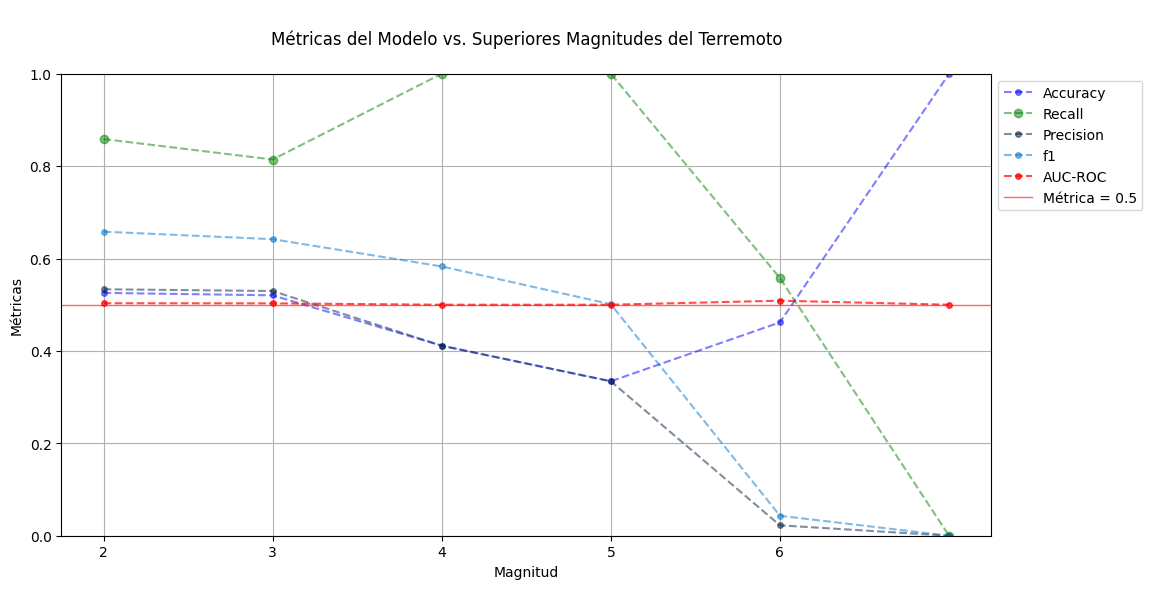

In [ ]:
# Gráfica

plt.figure(figsize=(12, 6))

plt.plot(magnitudes, accuracies, marker='o', linestyle='--', color='blue', alpha=0.5, markersize=4, label='Accuracy')
plt.plot(magnitudes, recalls, marker='o', linestyle='--', color='green', alpha=0.5, markersize=6, label='Recall')
plt.plot(magnitudes, precisions, marker='o', linestyle='--', color='#001F3F', alpha=0.5, markersize=4, label='Precision')
plt.plot(magnitudes, f1s, marker='o', linestyle='--', color='#0074CC', alpha=0.5, markersize=4, label='f1')
plt.plot(magnitudes, auc_rocs, marker='o', linestyle='--', color='red', alpha=0.7, markersize=4, label='AUC-ROC')

plt.axhline(y=0.5, color='red', linestyle='-', linewidth=1, alpha=0.6, label = 'Métrica = 0.5')  # Línea horizontal en y=0.5
plt.title(f'\nMétricas del Modelo vs. Superiores Magnitudes del Terremoto\n')
plt.xlabel(f'Magnitud')
plt.ylabel('Métricas')
plt.ylim(0, 1)  # Acotar el eje y entre 0 y 1
plt.grid(True)
plt.xticks(range(2, 7, 1))  # Para asegurarse de que solo aparezcan los valores enteros en el eje x
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig(path + f'/imagenes/probabilidad_magnitud_superior.png')
plt.show()

# Modelo Predictivo - Profundidad

In [ ]:
# superficial

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_0_dep.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df_dep_0 = pd.read_excel(file_path_terremotos)

In [ ]:
# 6º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_5_dep.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df_dep_5 = pd.read_excel(file_path_terremotos)

In [ ]:
# 6º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_11_dep.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df_dep_11 = pd.read_excel(file_path_terremotos)

In [ ]:
# 6º

# Ruta al archivo CSV en Google Drive
file_path_terremotos = path + '/dataframes_preprocesados/data_fusion_Fondo_dep.xlsx'   # Terremotos NO tectonicos (por defecto coge uno para pasarlo a la funcion aunque no lo usemos)

# Carga los datos en un DataFrame
df_dep_fondo = pd.read_excel(file_path_terremotos)

In [ ]:
df_dep = [df_dep_0, df_dep_5, df_dep_11, df_dep_fondo]

accuracies = []
recalls = []
precisions = []
f1s = []
auc_rocs = []
profundidades = ['superficial', '~ 5 km', '~ 11 km', '> 14 km']

for dep in df_dep:

  accuracy, recall, precision, f1, auc_roc = fit_and_get_accuracy_with_undersampling(dep, 'cantidad_lag_46')

  accuracies.append(accuracy)
  recalls.append(recall)
  precisions.append(precision)
  f1s.append(f1)
  auc_rocs.append(auc_roc)

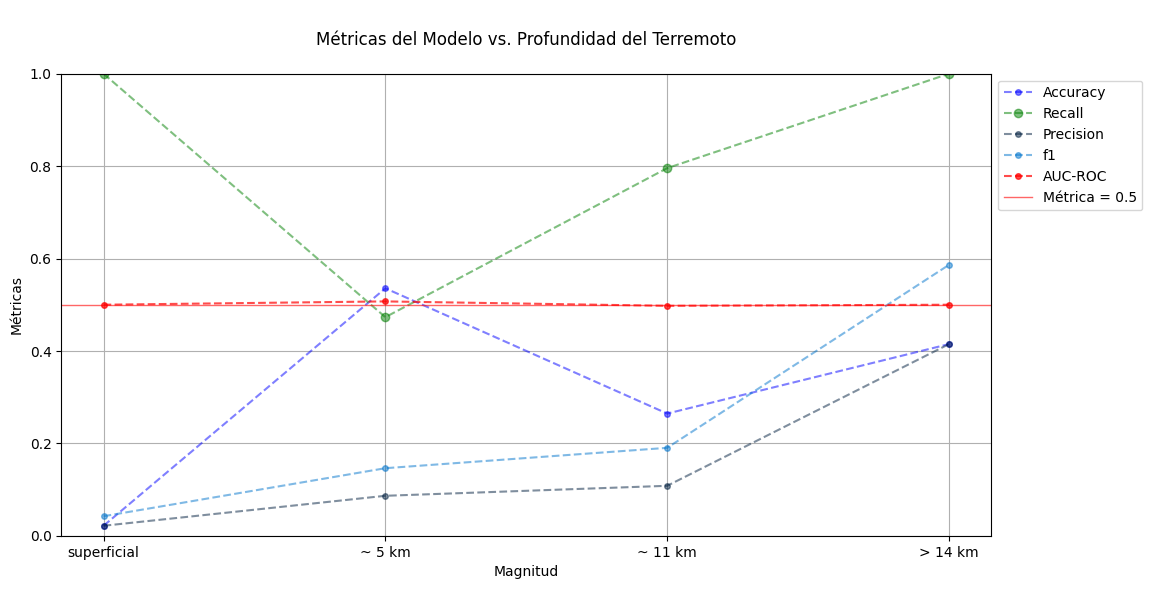

In [ ]:
# Gráfica

plt.figure(figsize=(12, 6))

plt.plot(profundidades, accuracies, marker='o', linestyle='--', color='blue', alpha=0.5, markersize=4, label='Accuracy')
plt.plot(profundidades, recalls, marker='o', linestyle='--', color='green', alpha=0.5, markersize=6, label='Recall')
plt.plot(profundidades, precisions, marker='o', linestyle='--', color='#001F3F', alpha=0.5, markersize=4, label='Precision')
plt.plot(profundidades, f1s, marker='o', linestyle='--', color='#0074CC', alpha=0.5, markersize=4, label='f1')
plt.plot(profundidades, auc_rocs, marker='o', linestyle='--', color='red', alpha=0.7, markersize=4, label='AUC-ROC')

plt.axhline(y=0.5, color='red', linestyle='-', linewidth=1, alpha=0.6, label = 'Métrica = 0.5')  # Línea horizontal en y=0.5
plt.title(f'\nMétricas del Modelo vs. Profundidad del Terremoto\n')
plt.xlabel(f'Magnitud')
plt.ylabel('Métricas')
plt.ylim(0, 1)  # Acotar el eje y entre 0 y 1
plt.grid(True)
#plt.xticks(range(2, 7, 1))  # Para asegurarse de que solo aparezcan los valores enteros en el eje x
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig(path + f'/imagenes/probabilidad_profundidad.png')
plt.show()

No se ve ninguna tendencia